# NATS3200: Practical 4 (Multiple linear regression and model selection, weeks 4 and 5) 

### Predicting the Olympic Games 

The Olympic Games have always mixed pure sporting spectacle with national competition. During the Cold
War the USA and the Soviet Union competed fiercely to win the most medals in each games. On a somewhat
milder level, in Britain we often compare our medal count with that of Australia, one of our traditional
sporting rivals. If you were in the UK during the summers of 2012 and 2016 you cannot have missed the
excitement caused by the UK’s success relative to previous years.
Figure

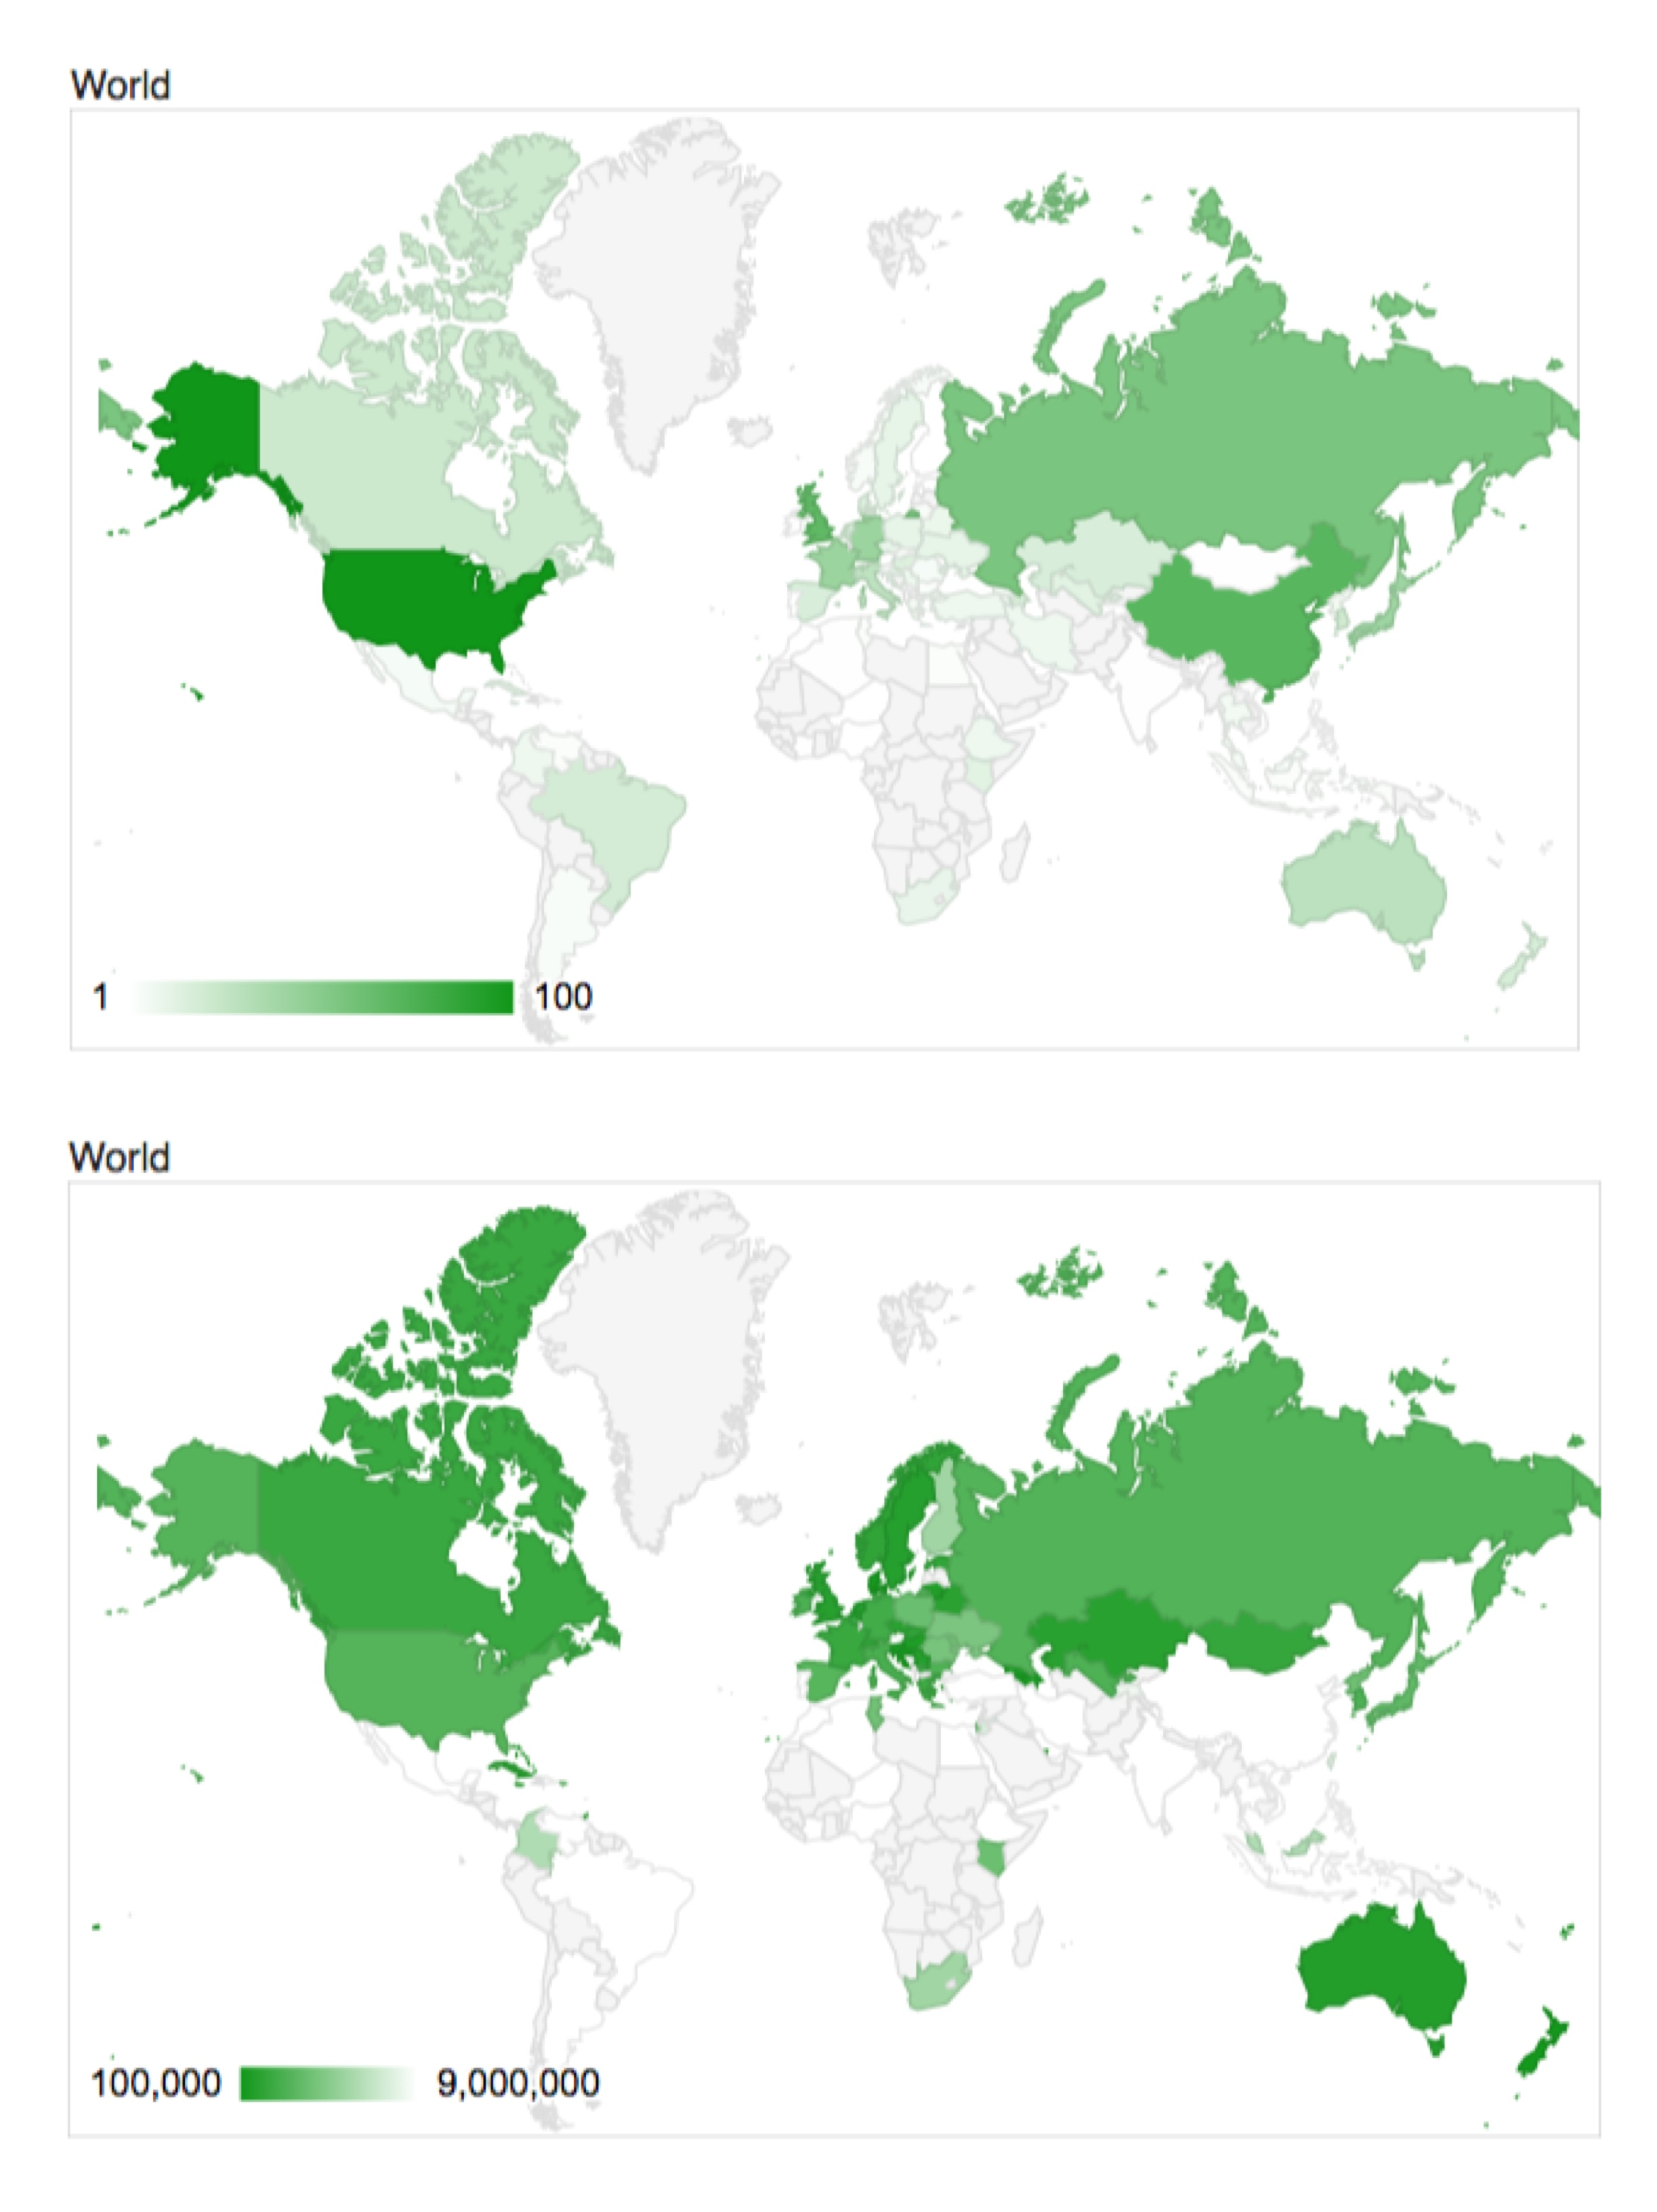
Figure 1: Total medals per country (top) and medals per capita (bottom) in the Rio 2016 Olympic Games
(credit: http://www.medalspercapita.com/)

This competition is usually expressed in terms of the number of medals won by each country’s athletes
((Figure 1 top panel). However, many interested watchers, especially those from smaller countries, have
pointed out that the medal table is hardly a fair reflection of a country’s sporting prowess. Some countries
have a strong tradition of sporting excellence, but are simply too small to make an impact in terms of total
medals. These commentators would rather look at the per capita medal count (Figure 1 bottom panel).

Looking at the per capita map above though, we see that large areas of the world are still very underrepresented.
Specifically, poorer countries do not win many medals per head of population. There are many
reasons for this, including a lack of investment in sport and facilities, and fewer individuals who are wealthy
enough to devote their life to training. As such, it has been suggested that we should compensate for wealth
when measuring a country’s Olympic performance.
In this practical you will investigate how the number of medals a country wins can be predicted from national
population and GDP, and how consistent these relationships are. This practical will run over this week and
the next.
Begin by downloading the data file medals.csv from MINERVA
This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

* Country name (as recognised by the IOC)
* Population
* GDP (in billions of US dollars)
* Medals won in Beijing 2008, London 2012 and Rio 2016


## 1. Perform a linear regression to predict the medal count in 2008 and 2012 (separately, in two regressions) from Population and GDP and report your results. (1 mark)

In [66]:
import pandas as pd
import numpy as np
df = pd.read_csv('./medals.csv')
df.head()

,Country,GDP,Population,Medal2008,Medal2012,Medal2016
0,Algeria,188.68,37100000,2,1,2
1,Argentina,445.99,40117096,6,4,4
2,Armenia,10.25,3268500,6,3,4
3,Australia,1371.76,22880619,46,35,29
4,Azerbaijan,63.40,9111100,7,10,18


In [67]:
from statsmodels.formula.api import glm
formula = 'Medal2008 ~ GDP + Population'
fit2008 = glm(formula,df).fit()
print(fit2008.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2008   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          133.15
Method:                          IRLS   Log-Likelihood:                -272.86
Date:                Tue, 07 Mar 2023   Deviance:                       9053.9
Time:                        15:03:18   Pearson chi2:                 9.05e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8863
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6133      1.506      3.728      0.0

In [68]:
formula = 'Medal2012 ~ GDP + Population'
fit2012 = glm(formula,df).fit()
print(fit2012.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2012   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          132.16
Method:                          IRLS   Log-Likelihood:                -272.59
Date:                Tue, 07 Mar 2023   Deviance:                       8986.6
Time:                        15:03:18   Pearson chi2:                 8.99e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8738
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0761      1.500      4.051      0.0

## 2. How consistent are the effects of Population and GDP over time? (1 mark)

The relationship between GDP and medal count appears to remain consistent with both 2008 and 2012 data, along with a small standard error. The relationship between population and medal count appears to be less significant. It is not consistent between the two data sets, and has a large standard error. For both models, 0 lies in the population 95% confidence confidence interval, so we cannot reject the null hypothesis.

## 3. Using the regression for the 2012 medal count make a prediction for the results of 2016. (1 mark)

In [69]:
predicted_df = pd.DataFrame({'Country': df['Country'],'GDP':df['GDP'], 'Population' : df['Population'], 'Actual2016' : df['Medal2016']})
prediction = fit2012.predict(predicted_df)
df['Prediction2016'] = prediction
df.head()


,Country,GDP,Population,Medal2008,Medal2012,Medal2016,Prediction2016
0,Algeria,188.68,37100000,2,1,2,7.697937
1,Argentina,445.99,40117096,6,4,4,9.660081
2,Armenia,10.25,3268500,6,3,4,6.170773
3,Australia,1371.76,22880619,46,35,29,16.572245
4,Azerbaijan,63.40,9111100,7,10,18,6.603459


## 4. Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation of the axes to make it these clearer. How good are the predictions? Which countries are outliers from the trend? (1 mark)

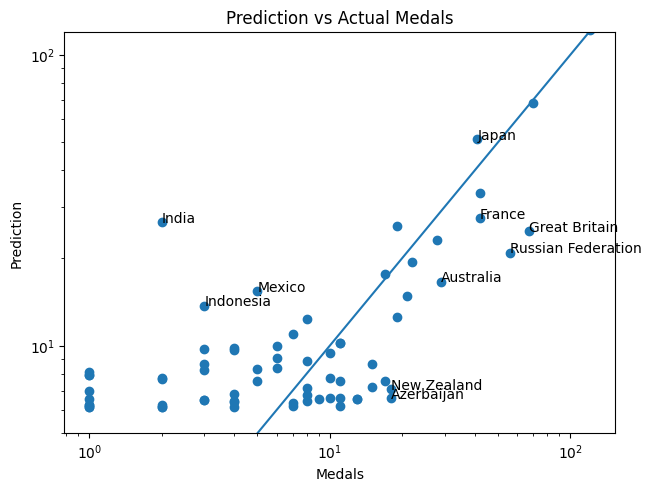

In [108]:
import matplotlib.pyplot as plt

x = range(0,120)
plt.ylim(5,120)
plt.yscale('log')
plt.xscale('log')
plt.scatter(df['Medal2016'],df['Prediction2016'])
plt.xlabel('Medals')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual Medals')
plt.plot(x, x)
outliers = []
for i, outlier in enumerate(df['Country']):
    if df['Medal2016'][i] >= (df['Prediction2016'][i] +10) or df['Medal2016'][i] <= (df['Prediction2016'][i] -10): 
        plt.annotate(outlier, (df['Medal2016'][i], df['Prediction2016'][i]))




Medal prediction plotted against actual medals. Outliers have been defined as anyone that got at least 10 medals over or under the prediction, and annotated on the graph above. Any country to the right of the line performed much better than expected and vice versa.

# WEEK 5
## 5. Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP alone; (iii) Population and GDP. Select the model that minimises the Akaike Information Criterion. (1 mark)


In [87]:
from scipy.stats import norm
formulas = ['Medal2012 ~ GDP + Population', 'Medal2012 ~ GDP', 'Medal2012 ~ Population']
for formula in formulas:
    current_model = glm(formula, df).fit()
    print(f'{formula} AIC = {current_model.aic}')


Medal2012 ~ GDP + Population AIC = 551.1869639299076
Medal2012 ~ GDP AIC = 549.7403906680169
Medal2012 ~ Population AIC = 616.1484076872775


From the different models we can see that the GDP model minimises the AIC.

## 6. Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii) Population and GDP. Does your result agree with the model selected by AIC? (1 mark)

Text(0, 0.5, 'Frequency')

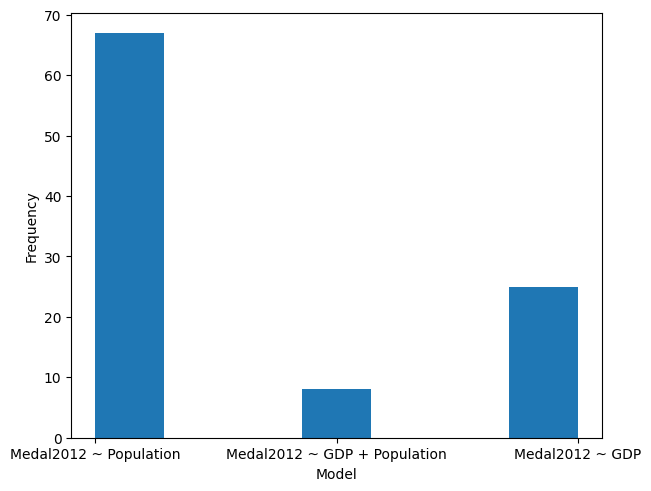

In [124]:
from sklearn.model_selection import train_test_split
predictive_LL = {}
aic = {}
winner = []
reps = 100
for rep in range(reps):
    train_data, test_data = train_test_split(df, test_size=0.5)
    for formula in formulas:
        current_model = glm(formula, train_data).fit()
        sigma = np.sqrt(current_model.scale)
        ypredict_mean = current_model.predict(test_data)
        predicted_df = pd.DataFrame({'ypredict_mean':ypredict_mean})
        predictive_LL[formula] = (np.sum(norm.logpdf(test_data['Medal2012'],loc = predicted_df[['ypredict_mean']], scale = sigma)))
    winner.append(max(predictive_LL, key = predictive_LL.get))

plt.hist(winner, bins = 7)
plt.xlabel('Model')
plt.ylabel('Frequency')

Interestingly, when performing the cross validation with a training and test data set, the Population model appears to win by a large amount every time. I would not expect this result with all signs pointing to GDP before, however I cannot seem to find a fault with the code.

In [93]:
formulas = ['Medal2012 ~ GDP + Population', 'Medal2012 ~ GDP', 'Medal2012 ~ Population']
for formula in formulas:
    predicted_df = pd.DataFrame({'Country': df['Country'],'GDP':df['GDP'], 'Population' : df['Population'], 'Actual2016' : df['Medal2016']})
    current_model = glm(formula, df).fit()
    prediction = current_model.predict(predicted_df)
    df[f'Predict{formula}'] = prediction
df.head()

,Country,GDP,Population,Medal2008,Medal2012,Medal2016,Prediction2016,PredictMedal2012 ~ GDP + Population,PredictMedal2012 ~ GDP,PredictMedal2012 ~ Population
0,Algeria,188.68,37100000,2,1,2,7.697937,7.697937,7.710687,11.816319
1,Argentina,445.99,40117096,6,4,4,9.660081,9.660081,9.721830,11.937801
2,Armenia,10.25,3268500,6,3,4,6.170773,6.170773,6.316074,10.454111
3,Australia,1371.76,22880619,46,35,29,16.572245,16.572245,16.957674,11.243783
4,Azerbaijan,63.40,9111100,7,10,18,6.603459,6.603459,6.731495,10.689360


## 7. Using the three fitted models from Q5, predict the results of Rio 2016. Which predicts best? Compare this result with earlier answers. (1 mark)

Medal2012 ~ GDP + Population outliers : 10
Medal2012 ~ GDP outliers : 9
Medal2012 ~ Population outliers : 13


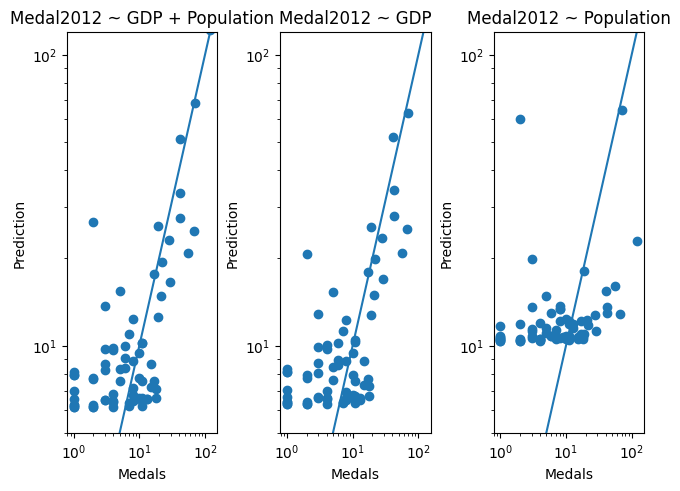

In [125]:
figs = [1,2,3]
plt.rcParams['figure.constrained_layout.use'] = True
for fig in figs:
    ax = plt.subplot(1,3,fig)
    ax.set_title(f'{formulas[fig-1]}')
    x = range(0,120)
    plt.ylim(5,120)
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df['Medal2016'],df[f'Predict{formulas[fig-1]}'])
    plt.xlabel('Medals')
    plt.ylabel('Prediction')
    plt.plot(x, x)
    outliers = []
    for i, outlier in enumerate(df['Country']):
        if df['Medal2016'][i] >= (df[f'Predict{formulas[fig-1]}'][i] +10) or df['Medal2016'][i] <= (df[f'Predict{formulas[fig-1]}'][i] -10): 
            #plt.annotate(outlier, (df['Medal2016'][i], df[f'Predict{formulas[fig-1]}'][i]))
            outliers.append(outlier)
    print(f'{formulas[fig-1]} outliers : {len(outliers)}')




When predicting the 2016 results using the 2012 models from question 5, we can see that the GDP model appears to be the best again, it has the least outliers. Population appears to be by far the worst for prediction, which again makes it strange that in Q6 it consistently performs the best agianst the other 2 models.

Text(0, 0.5, 'Frequency')

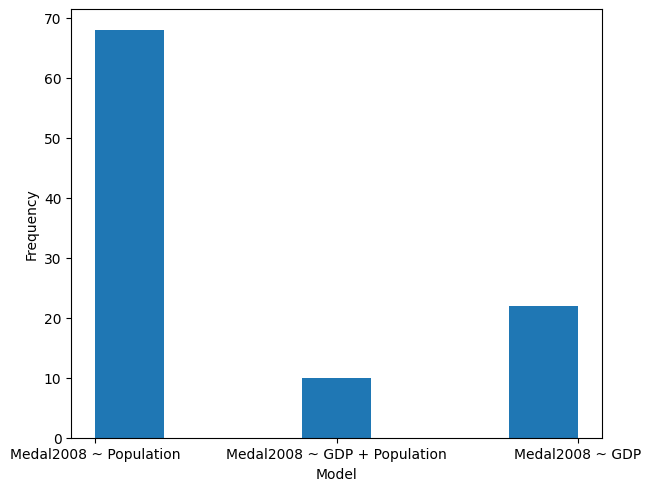

In [128]:
formulas = ['Medal2008 ~ GDP + Population', 'Medal2008 ~ GDP', 'Medal2008 ~ Population']

predictive_LL = {}
aic = {}
winner = []
reps = 100
for rep in range(reps):
    train_data, test_data = train_test_split(df, test_size=0.5)
    for formula in formulas:
        current_model = glm(formula, train_data).fit()
        sigma = np.sqrt(current_model.scale)
        ypredict_mean = current_model.predict(test_data)
        predicted_df = pd.DataFrame({'ypredict_mean':ypredict_mean})
        predictive_LL[formula] = (np.sum(norm.logpdf(test_data['Medal2008'],loc = predicted_df[['ypredict_mean']], scale = sigma)))
    winner.append(max(predictive_LL, key = predictive_LL.get))

plt.hist(winner, bins = 7)
plt.xlabel('Model')
plt.ylabel('Frequency')

To double check it was not exclusive to the 2012 data set, cross validation has also been performed with the 2008 medal count, and population wins again.

## Self-Assessment
Overall, I think I did well on the tasks, and my results are presented clearly. I'm getting a good hang of manipulating dataframes and pyplot.
I think something that could have gone better was the cross validation, which gave a result different to all the other questions which I am struggling to explain. This was true for both data sets from 2008 and 2012, as well as when using the AIC instead of LL. If anything that's what I would deserve an extra mark for.